In [1]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

set all necessary paths

In [2]:
path_timeseries='C:/Users/micha/OneDrive - MMU/PhD Manchester/Glacier_velocimetry/Veniaminof/Mount_Veniaminof_orbit_num_29_run_7/Mount_Veniaminof_orbit_num_29_run_7/Results/Glacier Velocities 1/csv files of monthly timeseries/'
path_climate='C:/Users/micha/OneDrive - MMU/PhD Manchester/Glacier_velocimetry/Veniaminof/climate_data/'
path_out = 'C:/Users/micha/OneDrive - MMU/PhD Manchester/PhD_thesis/Chapters/Chapter 6/correlation_plots/'


some other necessary code

In [3]:
pd.set_option('display.max_rows', None)

## event start and end dates
event_2021_start = datetime(2021,2,28)
event_2021_end = datetime(2021,4,3)

event_2018_start = datetime(2018,9,4)
event_2018_end = datetime(2019,1,10)

# years with no activity
no_activity_start = datetime(2019, 4, 15)
no_activity_end = datetime(2020, 12, 15)

# 2018 active period
period_2018_start = datetime(2017, 11, 15)
period_2018_end = datetime(2019, 4, 14)

import the timeseries points and point number

In [4]:
label_on_graph = 'velocity point 10'
data_label = 'precipitation [mm/day]'

# point 1
#point='lat=56.2144_long=-159.5454'

# point 2
#point='lat=56.2123_long=-159.5294'

# point 3
#point='lat=56.2111_long=-159.5068'

# point 4
#point='lat=56.2102_long=-159.4851'

# point 5
#point='lat=56.2062_long=-159.463'

# point 6
#point='lat=56.2047_long=-159.4451'

# point 7
#point='lat=56.2055_long=-159.4307'

# point 8
#point='lat=56.2079_long=-159.4215'

# point 9
#point='lat=56.2113_long=-159.4138'

# point 10
point='lat=56.2169_long=-159.406'


read in climate data (temperature or precipitation) and split to 2016 to 2022

In [5]:
file = 'iera5_tp_-159.4307355179E_56.2055350315N_n_su.dat.txt'
#file = 'iera5_t2m_-159.4307355179E_56.2055350315N_n_su.dat.txt'
path_climate_join=os.path.join(path_climate,file)

data_climate=pd.read_csv(path_climate_join,sep='\s+',skiprows=20,names=['year','January','February','March',
                                                              'April','May','June','July','August',
                                                              'September','October','November','December'])

data_climate=data_climate.set_index('year')
data_climate_split = data_climate.loc[2016:2022,:]



read in velocity timeseries data and assign data to 15 th of respective month, create datetime objects

In [6]:
file='Velocities_{}.csv'.format(point)
path_timeseries_join=os.path.join(path_timeseries,file)
data_timeseries = pd.read_csv(path_timeseries_join,header=None,names=['year','month','velocity'])

fill_days = np.full((len(data_timeseries),1),15).astype(int)

data_timeseries['day']=fill_days
data_timeseries = data_timeseries[['year','month','day','velocity']]

time_data=pd.to_datetime(data_timeseries[['year','month','day']],format='%Y%m%d')
data_timeseries=pd.concat([time_data,data_timeseries],axis=1)
data_timeseries.rename(columns={0 :'timestamp'}, inplace=True )
data_timeseries=data_timeseries.set_index('timestamp')
data_timeseries=data_timeseries.sort_values(by='timestamp')

# optionally take only data some time after launch of Sentinel-2B satellite (from November 15 2017)
#date_start = datetime(2017, 11, 15)
#date_end = datetime(2022, 1, 15)
#data_timeseries=data_timeseries.loc[date_start:date_end,:]

# optionally limit data to no-activity time period

data_timeseries=data_timeseries.loc[no_activity_start:no_activity_end,:]

# optionally limit data to 2018 active period
#data_timeseries=data_timeseries.loc[period_2018_start:period_2018_end,:]

print(data_timeseries)
#len(data_timeseries)

            year  month  day    velocity
timestamp                               
2019-04-15  2019      4   15  160.765539
2019-05-15  2019      5   15  161.326449
2019-06-15  2019      6   15  173.683141
2019-07-15  2019      7   15  197.913989
2019-08-15  2019      8   15  185.389154
2019-09-15  2019      9   15  175.735246
2019-10-15  2019     10   15  177.244613
2019-11-15  2019     11   15  177.678204
2019-12-15  2019     12   15  181.756708
2020-01-15  2020      1   15  181.059581
2020-02-15  2020      2   15  184.974090
2020-03-15  2020      3   15  182.148674
2020-04-15  2020      4   15  180.618204
2020-05-15  2020      5   15  175.506762
2020-06-15  2020      6   15  182.881805
2020-07-15  2020      7   15  189.847565
2020-08-15  2020      8   15  196.134436
2020-09-15  2020      9   15  205.054989
2020-10-15  2020     10   15  197.345931
2020-11-15  2020     11   15  190.631364
2020-12-15  2020     12   15  205.738382


take temperature data since 2016 (this step requires re-formatting of "data_climate_split")

In [7]:
years=[2016,2017,2018,2019,2020,2021,2022]

months=['January','February','March','April','May','June','July','August',
        'September','October','November','December']
target_format = []

for year in years:
    for month in months:
        value = data_climate_split.loc[year][month]
        if value != -999.9:
            target_format.append(value)

# optionally take only values after launch of Sentinel-2B satellite (from November 15 2017)   
#del target_format[0:22]
#del target_format[-1]
#del target_format[-1]

# for full dataset
#del target_format[0:4]
#del target_format[-1]
#del target_format[-1]

# for no-activity period
del target_format[0:39]
del target_format[-15:-1]
del target_format[-1]

# for 2018 active period
#del target_format[0:22]
#del target_format[-36:-1]
#del target_format[-1]

data_timeseries['climate_data']=target_format

#target_format.pop(0)
print(target_format)
#print(data_timeseries)
#len(target_format)
#len(data_timeseries)
#type(target_format)
print(data_climate_split)
#print(target_format)

[2.782822, 5.149841, 1.69754, 2.414703, 0.7781982, 8.958817, 9.592056, 5.691528, 8.127213000000001, 2.246857, 4.8274989999999995, 2.958298, 2.3765560000000003, 3.328323, 4.2915339999999995, 2.380371, 3.9176940000000005, 5.346298, 5.577087000000001, 8.125305, 5.775452]
       January  February     March       April         May        June  \
year                                                                     
2016  9.134293  6.187439  2.822876    4.243851    2.946854    2.681732   
2017  2.317429  2.006531  1.014709    3.364563    3.753662    2.162933   
2018  5.216599  6.165504  3.845215    4.041672    4.831314    2.723694   
2019  6.271362  5.922318  5.746841    2.782822    5.149841    1.697540   
2020  2.246857  4.827499  2.958298    2.376556    3.328323    4.291534   
2021  5.802155  4.851341  4.294395    4.653931    2.758026    2.828598   
2022  2.977371  5.851746  4.151344 -999.900000 -999.900000 -999.900000   

            July      August   September     October    November

plot timeseries vs climate data

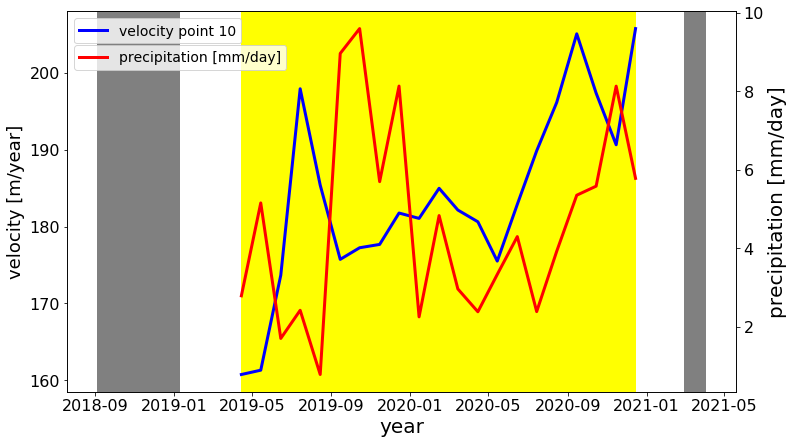

In [8]:
fig,ax=plt.subplots(figsize=(12,7))

# set gray regions for eruption periods

for item in range(0,len(data_climate_split)):
    plt.axvspan(event_2021_start,event_2021_end,facecolor='grey',alpha=0.5)
    plt.axvspan(event_2018_start,event_2018_end,facecolor='grey',alpha=0.5)
    plt.axvspan(no_activity_start,no_activity_end,facecolor='yellow',alpha=0.5)

# plot velocity

#ax.plot(data_timeseries['velocity'],color='b',linewidth=2,label='velocity point {}'.format(point_number))
ax.plot(data_timeseries['velocity'],color='b',linewidth=3,label=label_on_graph)
ax.set_xlabel('year',fontsize=20)
plt.xticks(fontsize=16)
ax.set_ylabel('velocity [m/year]',fontsize=18)
plt.yticks(fontsize=16)
ax.legend(loc=2,bbox_to_anchor=(0,1),prop={'size': 14})

# make twin axis
ax2=ax.twinx()

# plot climate data
ax2.plot(data_timeseries['climate_data'],color='r',linewidth=3,label=data_label)
#ax2.plot(data_timeseries['climate_data'],color='r',linewidth=2,label='precipitation in mm/year')
ax2.set_ylabel(data_label,fontsize=20)
#ax2.set_ylabel('precipitation in mm/year',fontsize=18)
plt.yticks(fontsize=16)

ax2.legend(loc=2,bbox_to_anchor=(0,0.93),prop={'size': 14})


[  0.198094   183.06426963]
 
0.1981 x + 183.1
[183.61552996 184.08442221 183.40054211 183.54260779 183.21842602
 184.83895749 184.96439833 184.19172715 184.67422173 183.50935851
 184.0205682  183.6502907  183.5350511  183.72359043 183.91439675
 183.53580683 183.84034129 184.12333916 184.16905708 184.67384377
 184.208352  ]


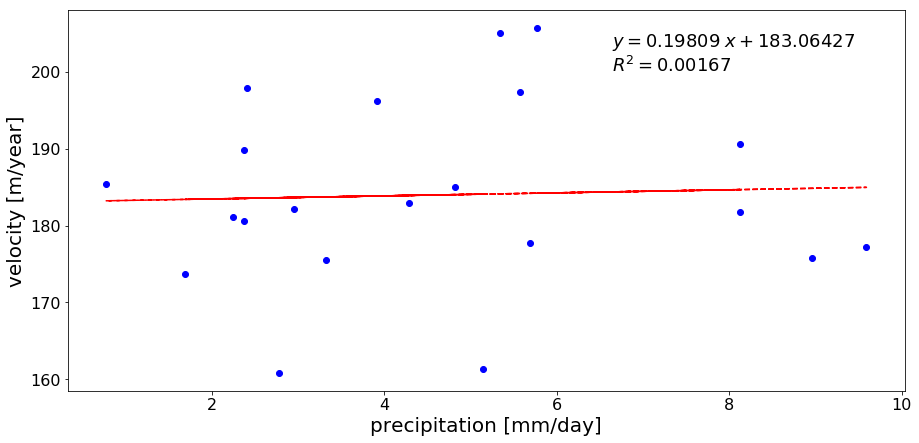

In [9]:
fig,ax=plt.subplots(figsize=(15,7))
ax.scatter(data_timeseries['climate_data'],data_timeseries['velocity'],color='b')
#ax.plot(data['velocity'],marker='o')


z = np.polyfit(data_timeseries['climate_data'],data_timeseries['velocity'], 1)
p = np.poly1d(z)
p_eval = np.poly1d(z)
p_eval = np.poly1d(z)(data_timeseries['climate_data'])
plt.plot(data_timeseries['climate_data'],p(data_timeseries['climate_data']),"r--")


text = f"$y={z[0]:0.5f}\;x{z[1]:+0.5f}$\n$R^2 = {r2_score(data_timeseries['velocity'],p_eval):0.5f}$"
plt.gca().text(0.65, 0.95, text,transform=plt.gca().transAxes,
     fontsize=18, verticalalignment='top')


#0.65, 0.95

#ax.plot(data['velocity'],marker='o')
ax.set_xlabel(data_label,fontsize=20)
plt.xticks(fontsize=16)
ax.set_ylabel('velocity [m/year]',fontsize=20)
plt.yticks(fontsize=16)


#ax.legend(loc=1,bbox_to_anchor=(0.97, 1))
print(z)
print(p)
print(p_eval)



0.12102300000000002
0.294874
0.173851
0.10153799999999999
0.11932000000000001
0.01778200000000002


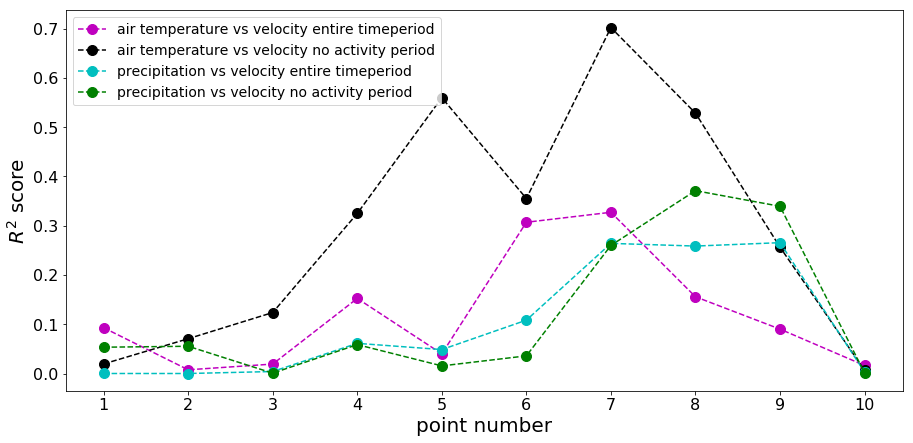

In [10]:
points = np.arange(1,11)

# r2 score values for temperature

r2_score_entire_period_temp = [0.09309,0.00777,0.01938,0.15258,0.04012,0.30713,0.32738,0.15594,0.09029,0.01655]
r2_score_no_activity_temp = [0.01964,0.07082,0.12395,0.32506,0.55993,0.35533,0.70220,0.52858,0.25667,0.00656]

# r2 score values for precipitation
r2_score_entire_period_precip = [0.00025,0.00023,0.00425,0.06143,0.04880,0.10847,0.26427,0.25884,0.26571,0.00313]
r2_score_no_activity_precip = [0.05359,0.05552,0.00091,0.05884,0.01568,0.03601,0.26019,0.37127,0.33952,0.00167]

avg_r2_score_entire_period_temp=np.asarray(r2_score_entire_period_temp).mean()
avg_r2_score_no_activity_temp=np.asarray(r2_score_no_activity_temp).mean()
difference_temp = avg_r2_score_no_activity_temp-avg_r2_score_entire_period_temp

avg_r2_score_entire_period_precip=np.asarray(r2_score_entire_period_precip).mean()
avg_r2_score_no_activity_precip=np.asarray(r2_score_no_activity_precip).mean()
difference_precip = avg_r2_score_no_activity_precip-avg_r2_score_entire_period_precip

fig,ax=plt.subplots(figsize=(15,7))
plt.plot(points,r2_score_entire_period_temp,"m--",marker='o',markersize=10,label='air temperature vs velocity entire timeperiod')
plt.plot(points,r2_score_no_activity_temp,"k--",marker='o',markersize=10,label='air temperature vs velocity no activity period')
plt.plot(points,r2_score_entire_period_precip,"c--",marker='o',markersize=10,label='precipitation vs velocity entire timeperiod')
plt.plot(points,r2_score_no_activity_precip,"g--",marker='o',markersize=10,label='precipitation vs velocity no activity period')

ax.set_xlabel('point number',fontsize=20)
plt.xticks(np.arange(min(points), max(points)+1, 1.0),fontsize=16)
ax.set_ylabel('$R^2$ score',fontsize=20)
plt.yticks(fontsize=16)

ax.legend(loc=2,bbox_to_anchor=(0,1),prop={'size': 14})

print(avg_r2_score_entire_period_temp)
print(avg_r2_score_no_activity_temp)
print(difference_temp)

print(avg_r2_score_entire_period_precip)
print(avg_r2_score_no_activity_precip)
print(difference_precip)